영화 감독이 꿈인 래진이는 영화에 대한 데이터 분석을 해보려고 합니다.
movie_metadata.csv에는 영화에 대한 제목, 감독, 배우, 평점, 예산 등의 정보가 있는데요.
과연 예산을 많이 쓰면 소비자 평점이 높아질 지 궁금합니다.
산점도를 그려봤더니, 아주 큰 예산을 쓴 영화 몇 개 때문에 상관 관계를 파악할 수가 없네요.
너무 예산이 큰 일부 영화를 제거하고, 다시 분석해봐야 할 것 같습니다.
예산을 기준으로 75% 지점에서 5 IQR 만큼 더한 것보다 큰 예산의 영화는 제거하고, 다시 산점도를 그려보세요.

In [25]:
%matplotlib inline
import pandas as pd

In [26]:
df = pd.read_csv('../data/movie_metadata.csv')
df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,English,Canada,NaN,7.7,84,2283
5039,The Following,NaN,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,Valorie Curry,Sam Underwood,English,USA,NaN,7.5,32000,1753
5040,A Plague So Pleasant,2013.0,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,English,USA,1400.0,6.3,16,0
5041,Shanghai Calling,2012.0,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,English,USA,NaN,6.3,660,2386


<Axes: xlabel='budget', ylabel='imdb_score'>

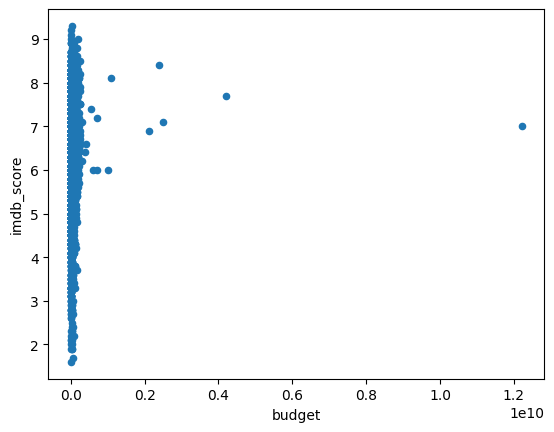

In [27]:
df.plot(kind='scatter', x='budget', y='imdb_score')

In [28]:
q1 = df['budget'].quantile(0.25)
q3 = df['budget'].quantile(0.75)
iqr = q3 - q1
condition = df['budget'] > q3 + (5 * iqr)

In [29]:
df.drop(df[condition].index, inplace=True)

<Axes: xlabel='budget', ylabel='imdb_score'>

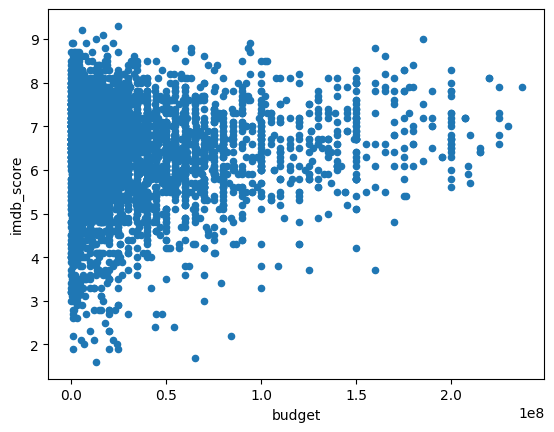

In [30]:
df.plot(kind='scatter', x='budget', y='imdb_score')